In [121]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%load_ext autoreload
%autoreload 2
%matplotlib inline
from matplotlib import pyplot as plt
from feat_desc import *
import cv2
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000,formatter=dict(float=lambda x: "%.3g" % x))
from corner_detector import *
from anms import *
from feat_match import *
from ransac_est_homography import *

max_anms=3000

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [122]:
# img1=cv2.imread('small-right.jpg')
img1=cv2.imread('small-middle.jpg')
# img1=cv2.imread('case1.png')
# img1=cv2.imread('rot-middle.jpg')
gray = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
c = corner_detector(gray)
print(np.sum(c>0))
X1,Y1,rmax=anms(c, max_anms)
d1 = feat_desc(gray,X1,Y1)
kp1=[]
for (_x,_y) in zip(X1,Y1):
    kp1.append(cv2.KeyPoint(_x,_y,40))


16328


In [127]:
img2=cv2.imread('small-left.jpg')
# img2=cv2.imread('small-right.jpg')
# img2=cv2.imread('case2.png')
gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
c = corner_detector(gray)
print(np.sum(c>0))
X2,Y2,rmax=anms(c, max_anms)
d2 = feat_desc(gray,X2,Y2)
print("Rmax" + str(rmax))
kp2=[]
for (_x,_y) in zip(X2,Y2):
    kp2.append(cv2.KeyPoint(_x,_y,40))


6051
Rmax4.242640687119285


In [128]:
m,dMatch=feat_match(d1, d2)
x1=[]
y1=[]
x2=[]
y2=[]

for k,idx in enumerate(m):
    if (idx != -1):
        # is 0 x or 1 x?
        x1.append(X1[idx])
        y1.append(Y1[idx])
        x2.append(X2[k])
        y2.append(Y2[k])
x1=np.array(x1)
x2=np.array(x2)
y1=np.array(y1)
y2=np.array(y2)
# print(X1.shape)

In [129]:
# f=np.vstack((x1,y1))
# points1 = f.T
# g=np.vstack((x2,y2))
# points2 = g.T
# H, mask = cv2.findHomography(points1, points2)
# print(mask)

11
1.468997409636092e-08
1.4129999966076865e-08
1.4095179771404261e-08
1.1305745403884512e-08
1.0438720891592561e-08
3.1143964009934137e-09
2.7150688759695072e-09
MaxInlierCount4
[[-4.54 7.26 2.3e+03]
 [-2.42 4.34 1.34e+03]
 [-0.00291 0.00794 1]]


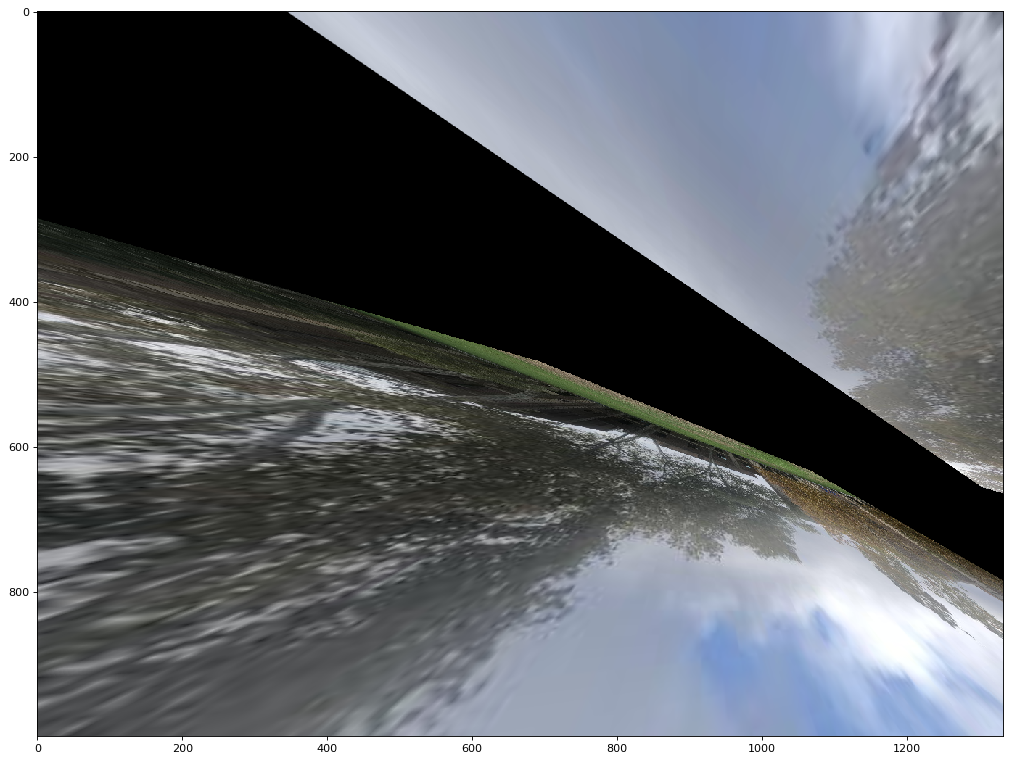

In [130]:
print(len(x1))
H, inlier_ind=ransac_est_homography(x1,y1,x2,y2,0.5)

result = cv2.warpPerspective(img1, H,(int(img1.shape[1]), int(img1.shape[0])))#,flags=cv2.INTER_LINEAR)
fig=plt.figure(figsize=(16, 12), dpi= 80, facecolor='w', edgecolor='k')
print(H)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()

4


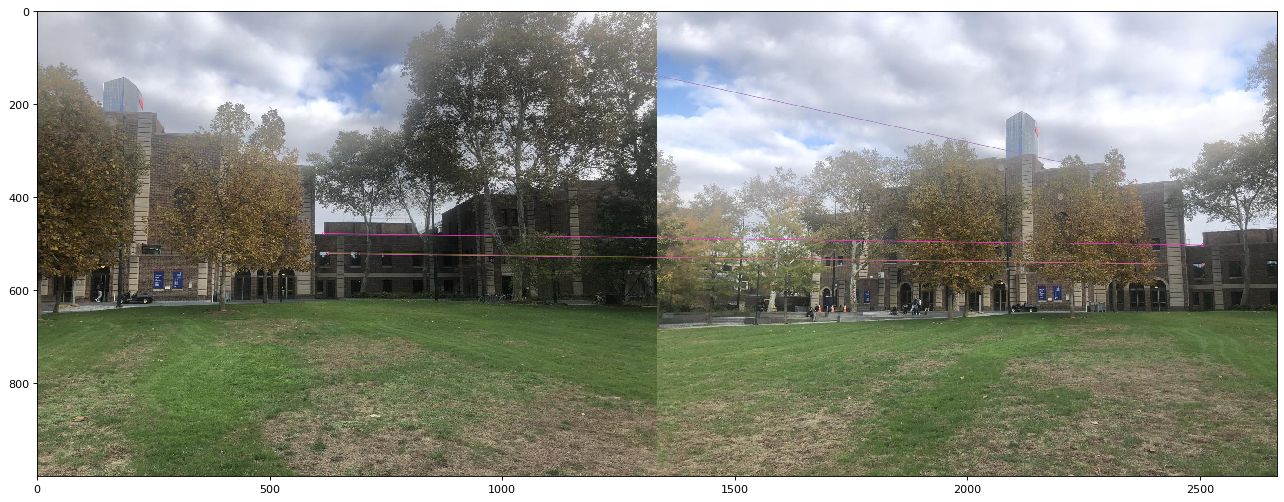

In [ ]:
mask = np.array(inlier_ind, dtype=bool)

mfilter = []
for idx,i in enumerate(mask):
    if i == True:
        mfilter.append(dMatch[idx])
img_matches = np.empty((max(img1.shape[0], img2.shape[0]), img1.shape[1]+img2.shape[1], 3), dtype=np.uint8)
print(len(mfilter))
f=cv2.drawMatches(img1, kp1, img2, kp2, mfilter, img_matches, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
fig=plt.figure(figsize=(20, 18), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB))
plt.show()
f=cv2.drawMatches(img1, kp1, img2, kp2, dMatch, img_matches, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
fig=plt.figure(figsize=(20, 18), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
inlier_ind = inlier_ind.astype('bool')
print(x1[inlier_ind])
print(y1[inlier_ind])
print(x2[inlier_ind])
print(y2[inlier_ind])
print(inlier_ind)

In [ ]:
stk = np.vstack((x1[inlier_ind],y1[inlier_ind],np.ones(np.sum(inlier_ind))))
j = H@stk
j = j/j[-1]
print(j)

In [ ]:
fig=plt.figure(figsize=(16, 12), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(img)
plt.scatter(x, y)
plt.axis('off')

In [ ]:
d = feat_desc(gray,x,y)

In [ ]:
# x_,y_ = np.meshgrid(np.arange(img1.shape[1]),np.arange(img1.shape[0]))
# pts_set = np.vstack(([x_.flatten()],[y_.flatten()],np.ones(len(x_.flatten()))))
# print(pts_set)
# stk = H@pts_set
# inds = np.ravel_multi_index(stk.astype('int'),(img1.shape[1], img1.shape[0]))
# flat_img = img1.reshape((img1.shape[0]*img1.shape[1],3))
# res_img = flat_img[inds]
# res_img = res_img.reshape((im.shape[0],im.shape[1],3))
# plt.imshow(cv2.cvtColor(res_img, cv2.COLOR_BGR2RGB))


In [ ]:
for i in d:
    print(i)

In [ ]:
x = [[4,5,6],[1,2,3]]
res=np.linalg.norm(x,axis=1)
res.argsort()
print(res.argsort())

In [ ]:
x[-1]

In [ ]:
print(H)
mask = np.array(inlier_ind, dtype=bool)
# print(mask)
# print(x1*mask)
# print(y1*mask)
stack = np.vstack((x1*mask,y1*mask,np.ones((x1.shape))))
res = H@stack
print("-1:",end=" ")
print(res/res[-1])
print("reg:",end=" ")
print(res[0]/res[2])

stack = np.vstack((x2*mask,y2*mask,np.ones((x1.shape))))
print(stack)

In [ ]:
#img.shape[1],img.shape[0]
x,y = np.meshgrid(np.arange(100),np.arange(50))
pts_set = np.vstack(([x.flatten()],[y.flatten()],np.ones(len(x.flatten()))))

In [ ]:
x1 = np.array([-1,-1,1,1,0,0,                     90,222,88])
y1 = np.array([1,-1,-1,1,0,1,                     12321,33,1])
x2 = np.array([0,-2**0.5,0,2**0.5,0,0.5*(2**0.5), 777,3,4])
y2 = np.array([2**0.5,0,-2**0.5,0,0,0.5*(2**0.5), 2,9,999])


In [ ]:
for i in range(100):
    H, inlier_ind=ransac_est_homography(x1,y1,x2,y2,0.5)


In [ ]:
print(inlier_ind)
print(H)

In [ ]:
# p1 = [(88,1),(-1,1),(1,1),(1,-1)]
# p2 = [(4,999),(0,2**0.5),(2**0.5,0),(2**0.5,-2**0.5)]
x1 = np.array([-1,-1,1,1,0,0,                     90,222,88])
y1 = np.array([1,-1,-1,1,0,1,                     12321,33,1])
x2 = np.array([0,-2**0.5,0,2**0.5,0,0.5*(2**0.5), 777,3,4])
y2 = np.array([2**0.5,0,-2**0.5,0,0,0.5*(2**0.5), 2,9,999])
# [8, 0, 3, 2]
pts=[0,5,3,8]
p1 = [(x1[pts[0]],y1[pts[0]]),(x1[pts[1]],y1[pts[1]]),(x1[pts[2]],y1[pts[2]]),(x1[pts[3]],y1[pts[3]])]
p2 = [(x2[pts[0]],y2[pts[0]]),(x2[pts[1]],y2[pts[1]]),(x2[pts[2]],y2[pts[2]]),(x2[pts[3]],y2[pts[3]])]
print(p2)
pointsTotal = len(p1)

A = np.zeros((8,9))
# Homography matrix
for i in range(4): # Using the corners
        A[i*2,:] = [ p1[i][1], p1[i][0], 1, 0, 0, 0, -p2[i][1]*p1[i][1], -p2[i][1]*p1[i][0], -p2[i][1] ]
        A[i*2+1,:] = [0, 0, 0, p1[i][1], p1[i][0], 1, -p2[i][0]*p1[i][1], -p2[i][0]*p1[i][0], -p2[i][0] ]


# Alternative (provide worse results)
#[V,W] = np.linalg.eig(np.dot(A.T,A))
#m = W[:,-1]

[U,S,V]=np.linalg.svd(A)
m = V[-1,:]/V[-1,-1]
print(m)
H = np.reshape(m,(3,3))
print(H.T)
# print(p2[2])
pt=3
v=H.T@np.append(p1[pt],1)
v=v/v[-1]
print(v[0:2]-p2[pt])
# It should be close to zero
print("This value should be close to zero: "+str(np.sum(np.matmul(A,m))))

In [ ]:
o=np.array([2.05e-18 6.52e-19 1.4e-18 1.57e-16 2.57e-16 -1.79e-16 1.55e-18 -1 1])

In [ ]:
print(img1[1203:1203+40,:])

In [ ]:
img = gray
padImage = np.zeros((img.shape[0]+40,img.shape[1]+40))
padImage[20:img.shape[0]+20,20:img.shape[1]+20] = img
# #first 20 rows
for i in range(20):
    for j in range(20,img.shape[1]+20):
        padImage[i,j] = padImage[i+20,j]
#first 20 columns
for i in range(20,img.shape[0]+20):
    for j in range(20):
        padImage[i,j] = padImage[i,j+20]
# last 20 rows
for i in range(img.shape[0]+20,img.shape[0]+40):
    for j in range(20,img.shape[1]+20):
        padImage[i,j] = padImage[i-20,j]
#last 20 cols
for i in range(20,img.shape[0]+20):
    for j in range(img.shape[1]+20,img.shape[1]+40):
        padImage[i,j] = padImage[i,j-20]
plt.imshow(padImage)